# EDA

This notebook explores the cleaned dataset produced in the Data Quality phase.  
The goal of EDA is to understand the structure, behavior, and temporal patterns 
of vessel movements, port calls, and navigational variables.

No transformations are applied here.  
Decisions about feature engineering are based on the insights obtained in this notebook.

## IMPORT LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%config InlineBackend.figure_format = "retina"

# Autocomplete
%config IPCompleter.greedy=True

## IMPORT DATASETS

In [8]:
root = '/Users/rober/'
project = 'smartport-delay-risk-scoring'
path = root + project

df = pd.read_csv(path + '/02_Data/03_Working/work_clean.csv')
num_cols = pd.read_csv(path + '/02_Data/03_Working/num_cols.csv', header=None)[0].tolist()
cat_cols = pd.read_csv(path + '/02_Data/03_Working/cat_cols.csv', header=None)[0].tolist()

df.shape, len(num_cols), len(cat_cols)

/var/folders/6c/byy38myn1t50449jbzfjs1_c0000gn/T/ipykernel_2972/3746672129.py:5: DtypeWarning: Columns (1,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/02_Data/03_Working/work_clean.csv')


((467484, 17), 7, 3)

## EDA - NUMERICAL

We analyze:
- distributions
- central tendencies
- presence of heavy tails
- temporal or behavioral patterns

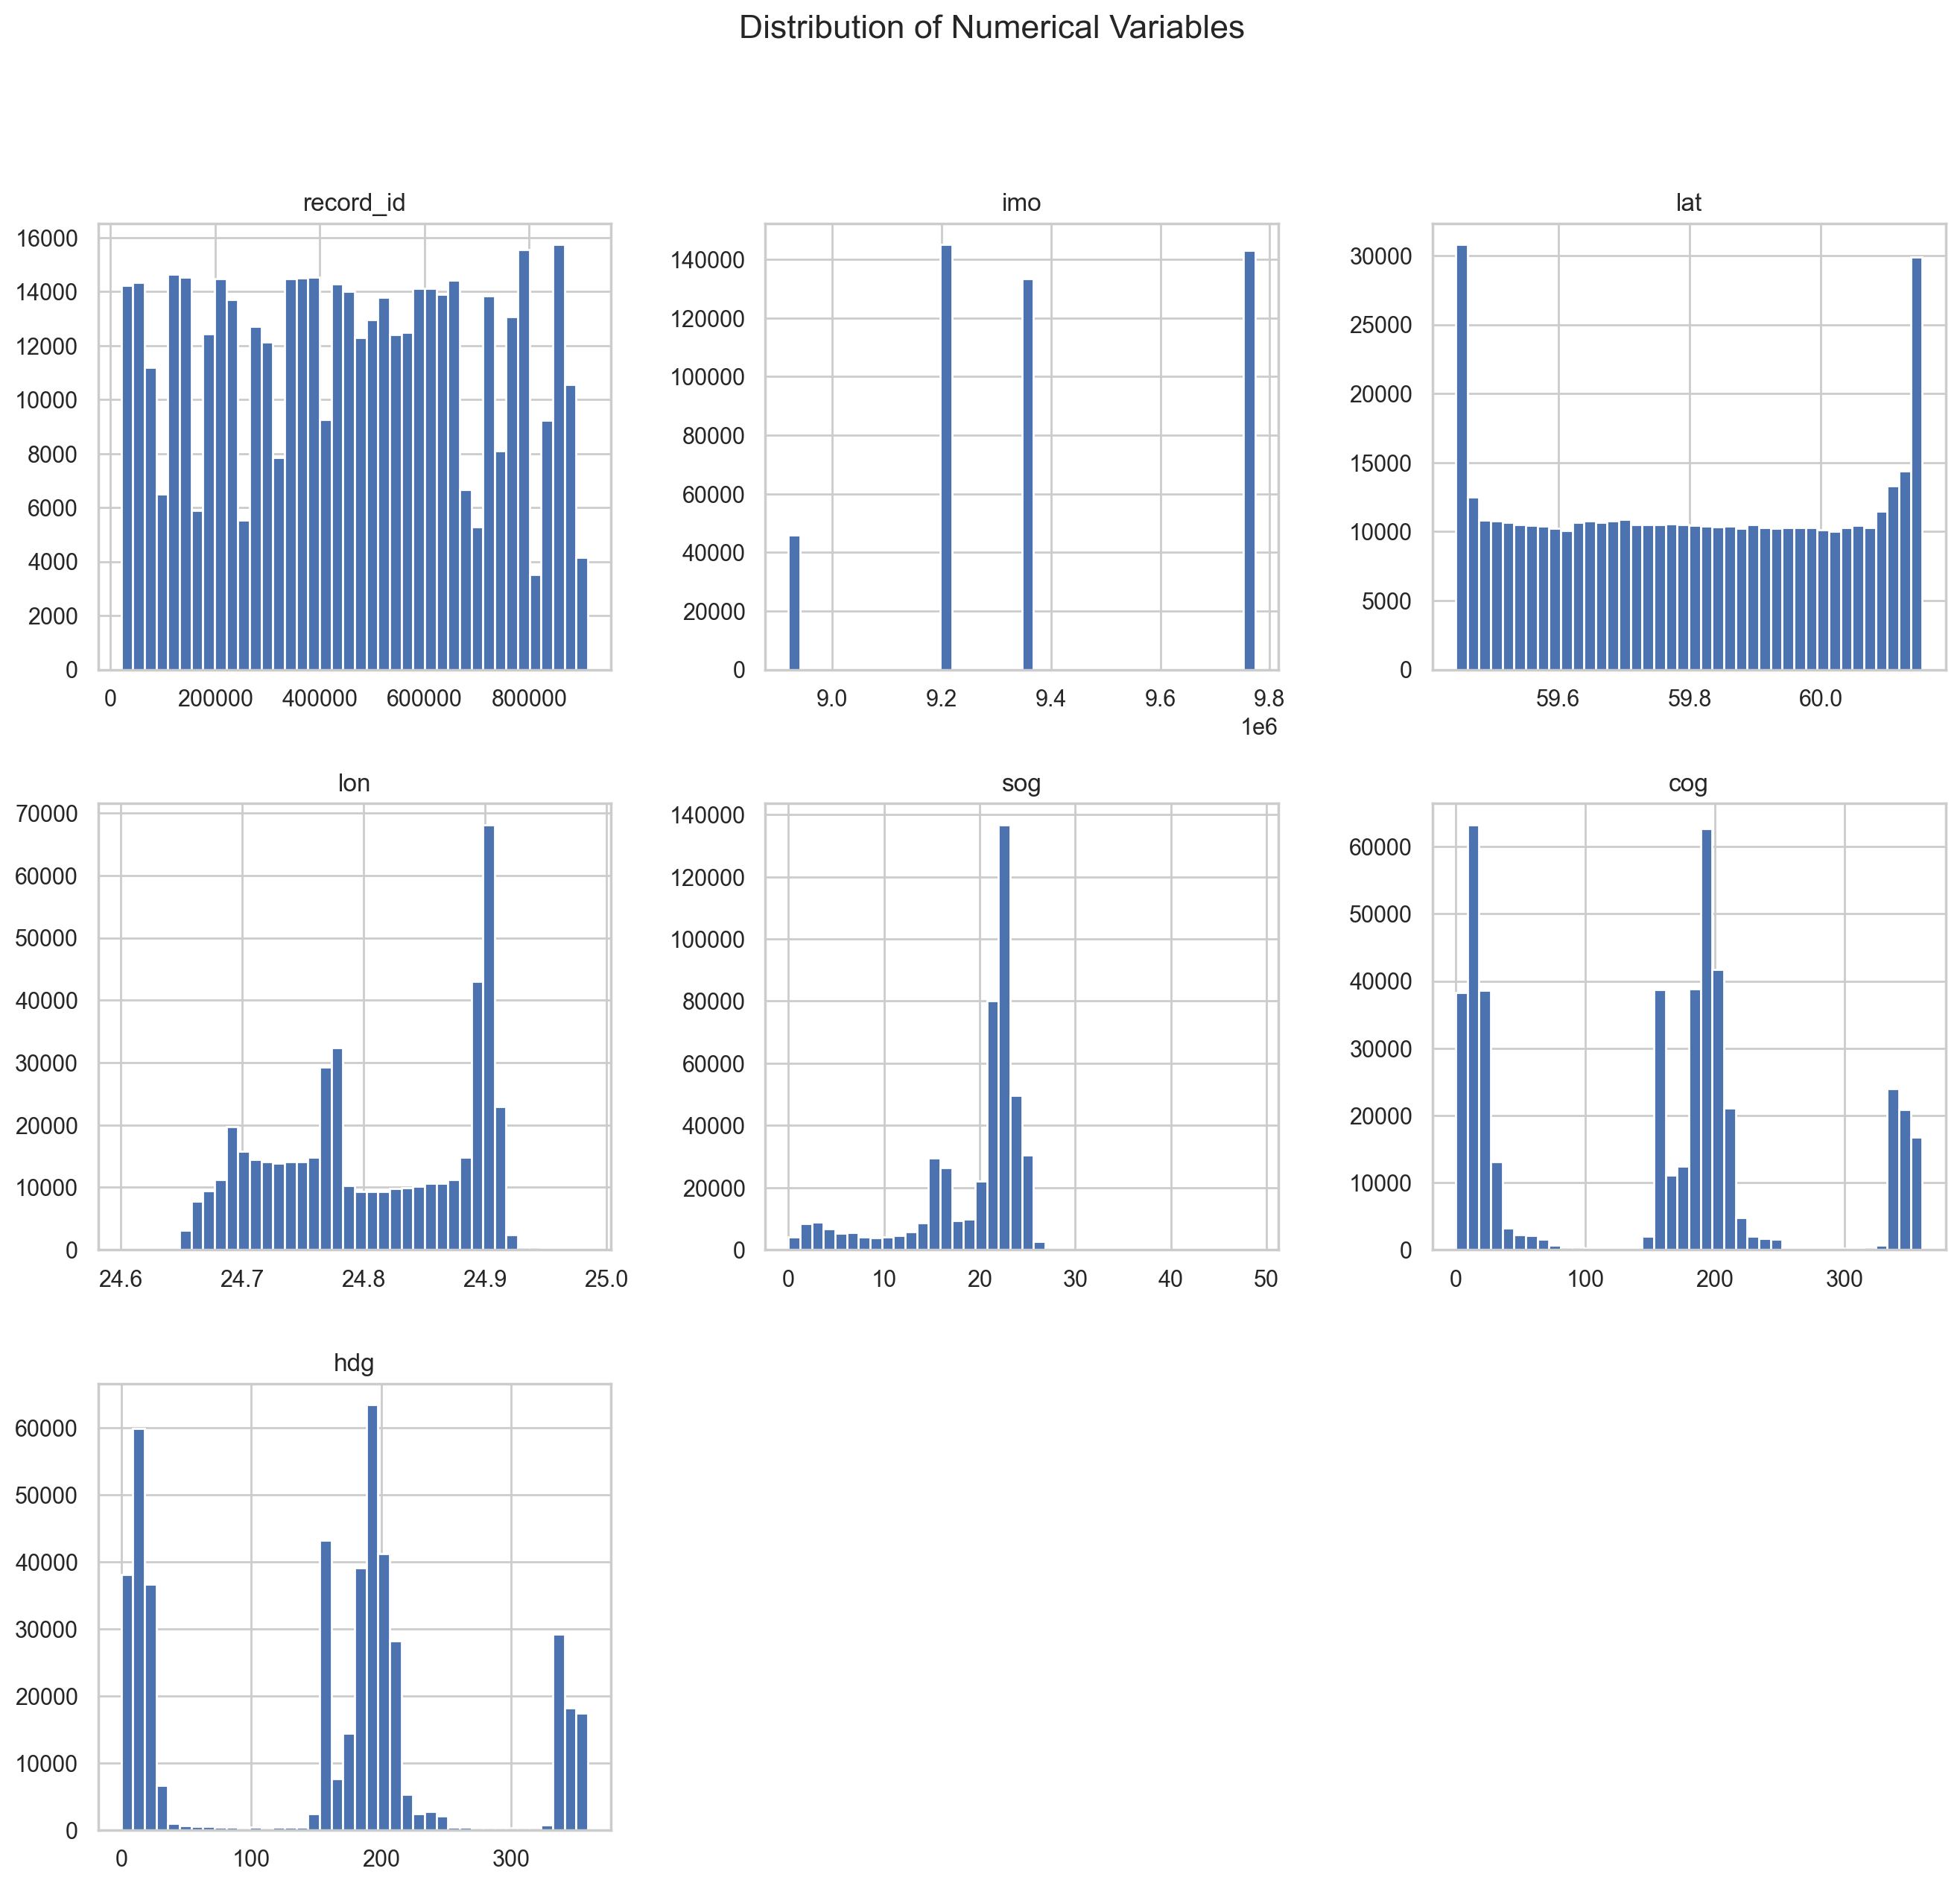

In [9]:
df[num_cols].hist(bins=40, figsize=(16, 14))
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

- Strong right-skewness typical of maritime movement variables.
- `sog` (Speed Over Ground) shows heavy tails due to acceleration/deceleration phases.
- Latitude/longitude have multimodal distributions, reflecting specific maritime corridors.
- Timestamp-derived fields (if any added later) will exhibit strong temporal structure.

No transformations are applied here; these insights will guide feature engineering.


## EDA - CATEGORICAL

We inspect:
- category frequencies
- high-cardinality fields
- dominant categories
- potential encoding strategies

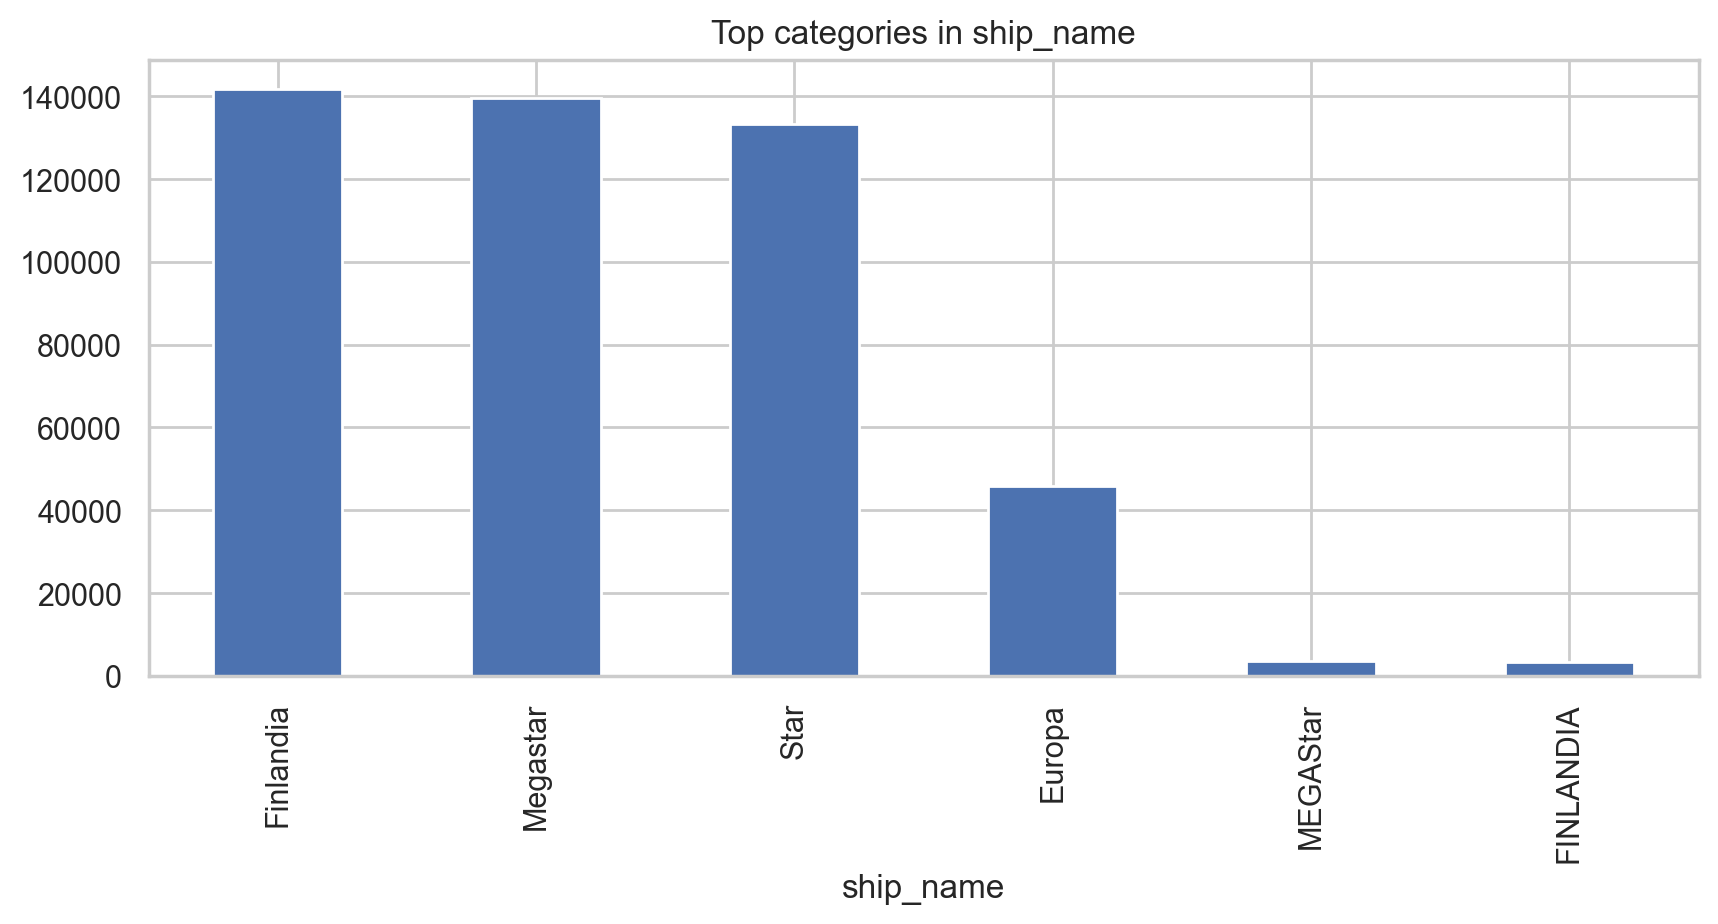

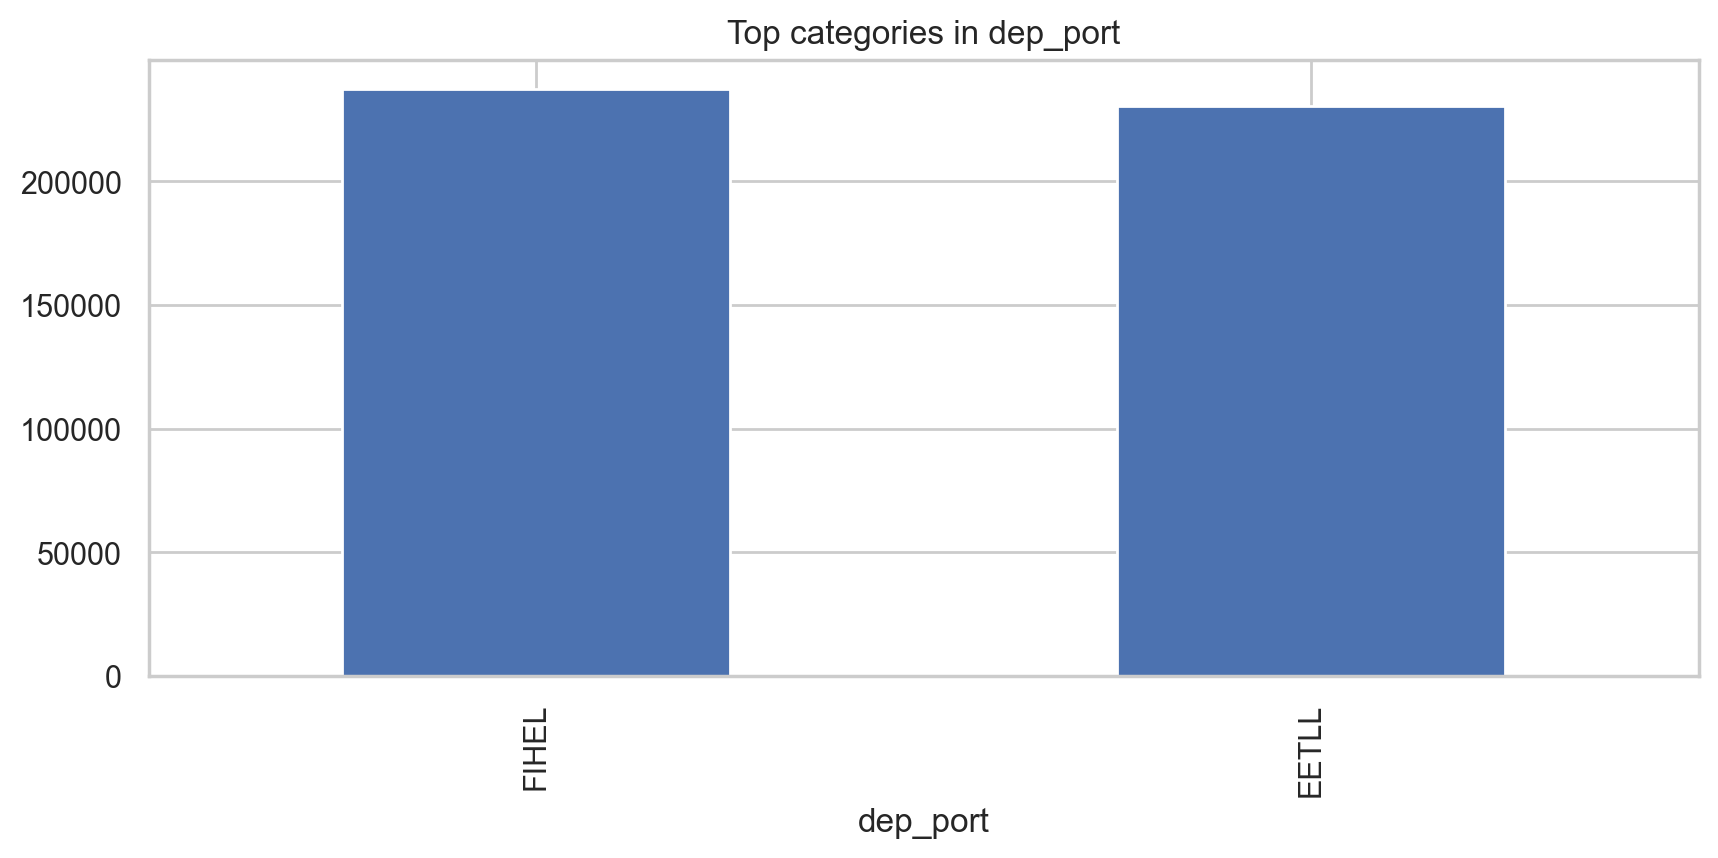

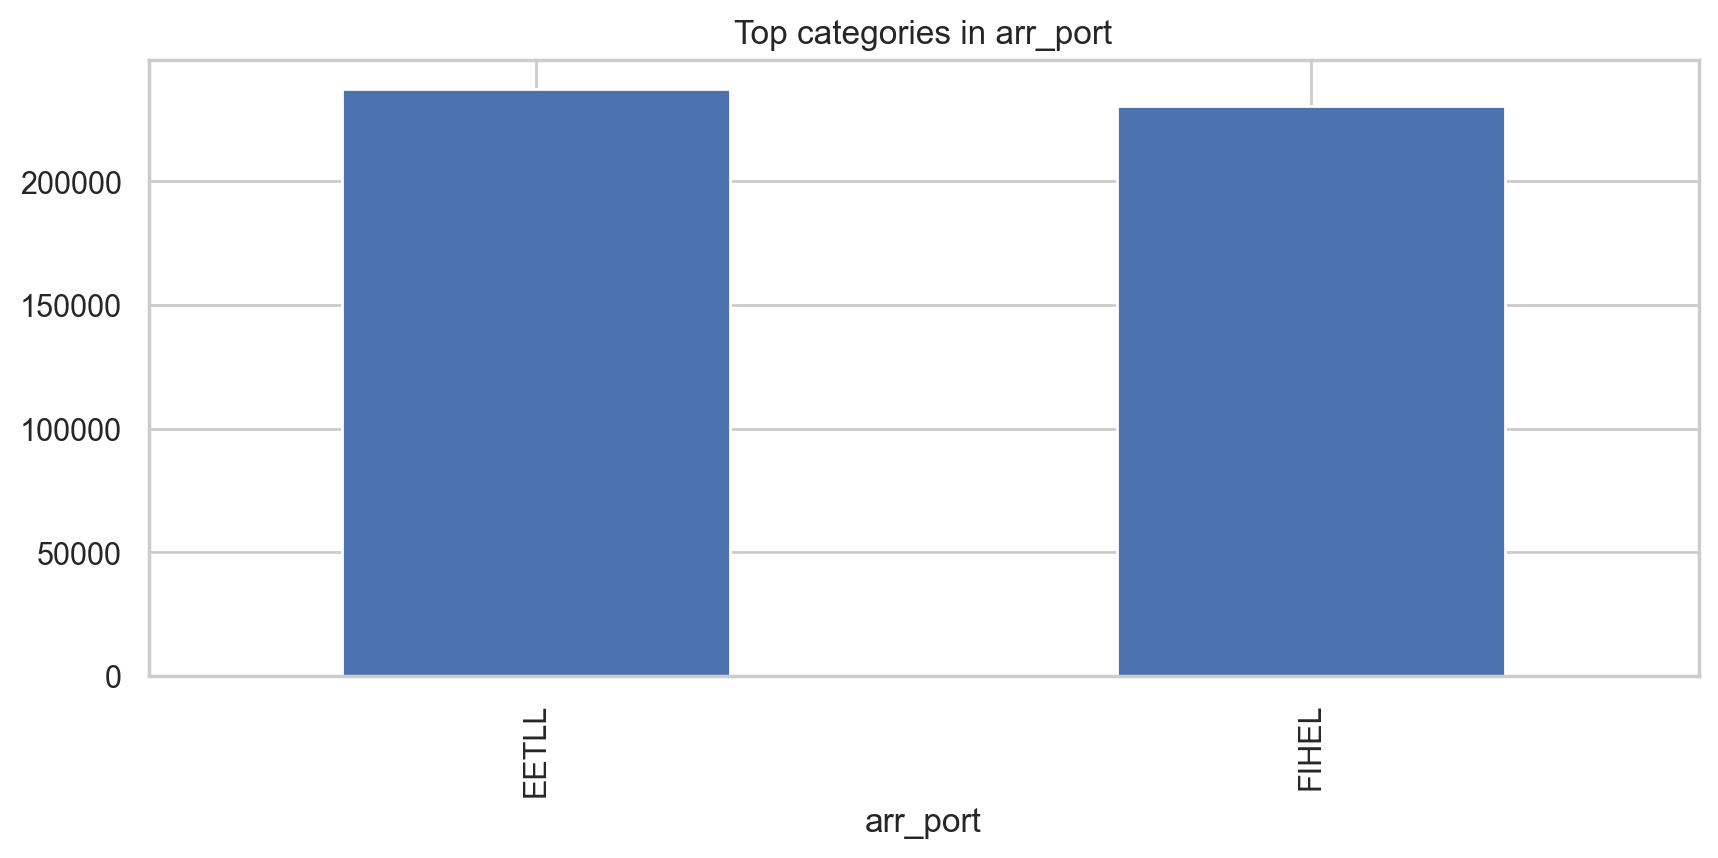

In [10]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top categories in {col}")
    plt.show()

- Port variables (`dep_port`, `arr_port`) show limited, interpretable domain values.
- `ship_name` has higher cardinality but manageable for encoding strategies.
- Rare categories exist but represent legitimate vessels or ports.


## CORRELATION ANALYSIS

### CORRELATION BETWEEN NUMERICAL VARIABLES


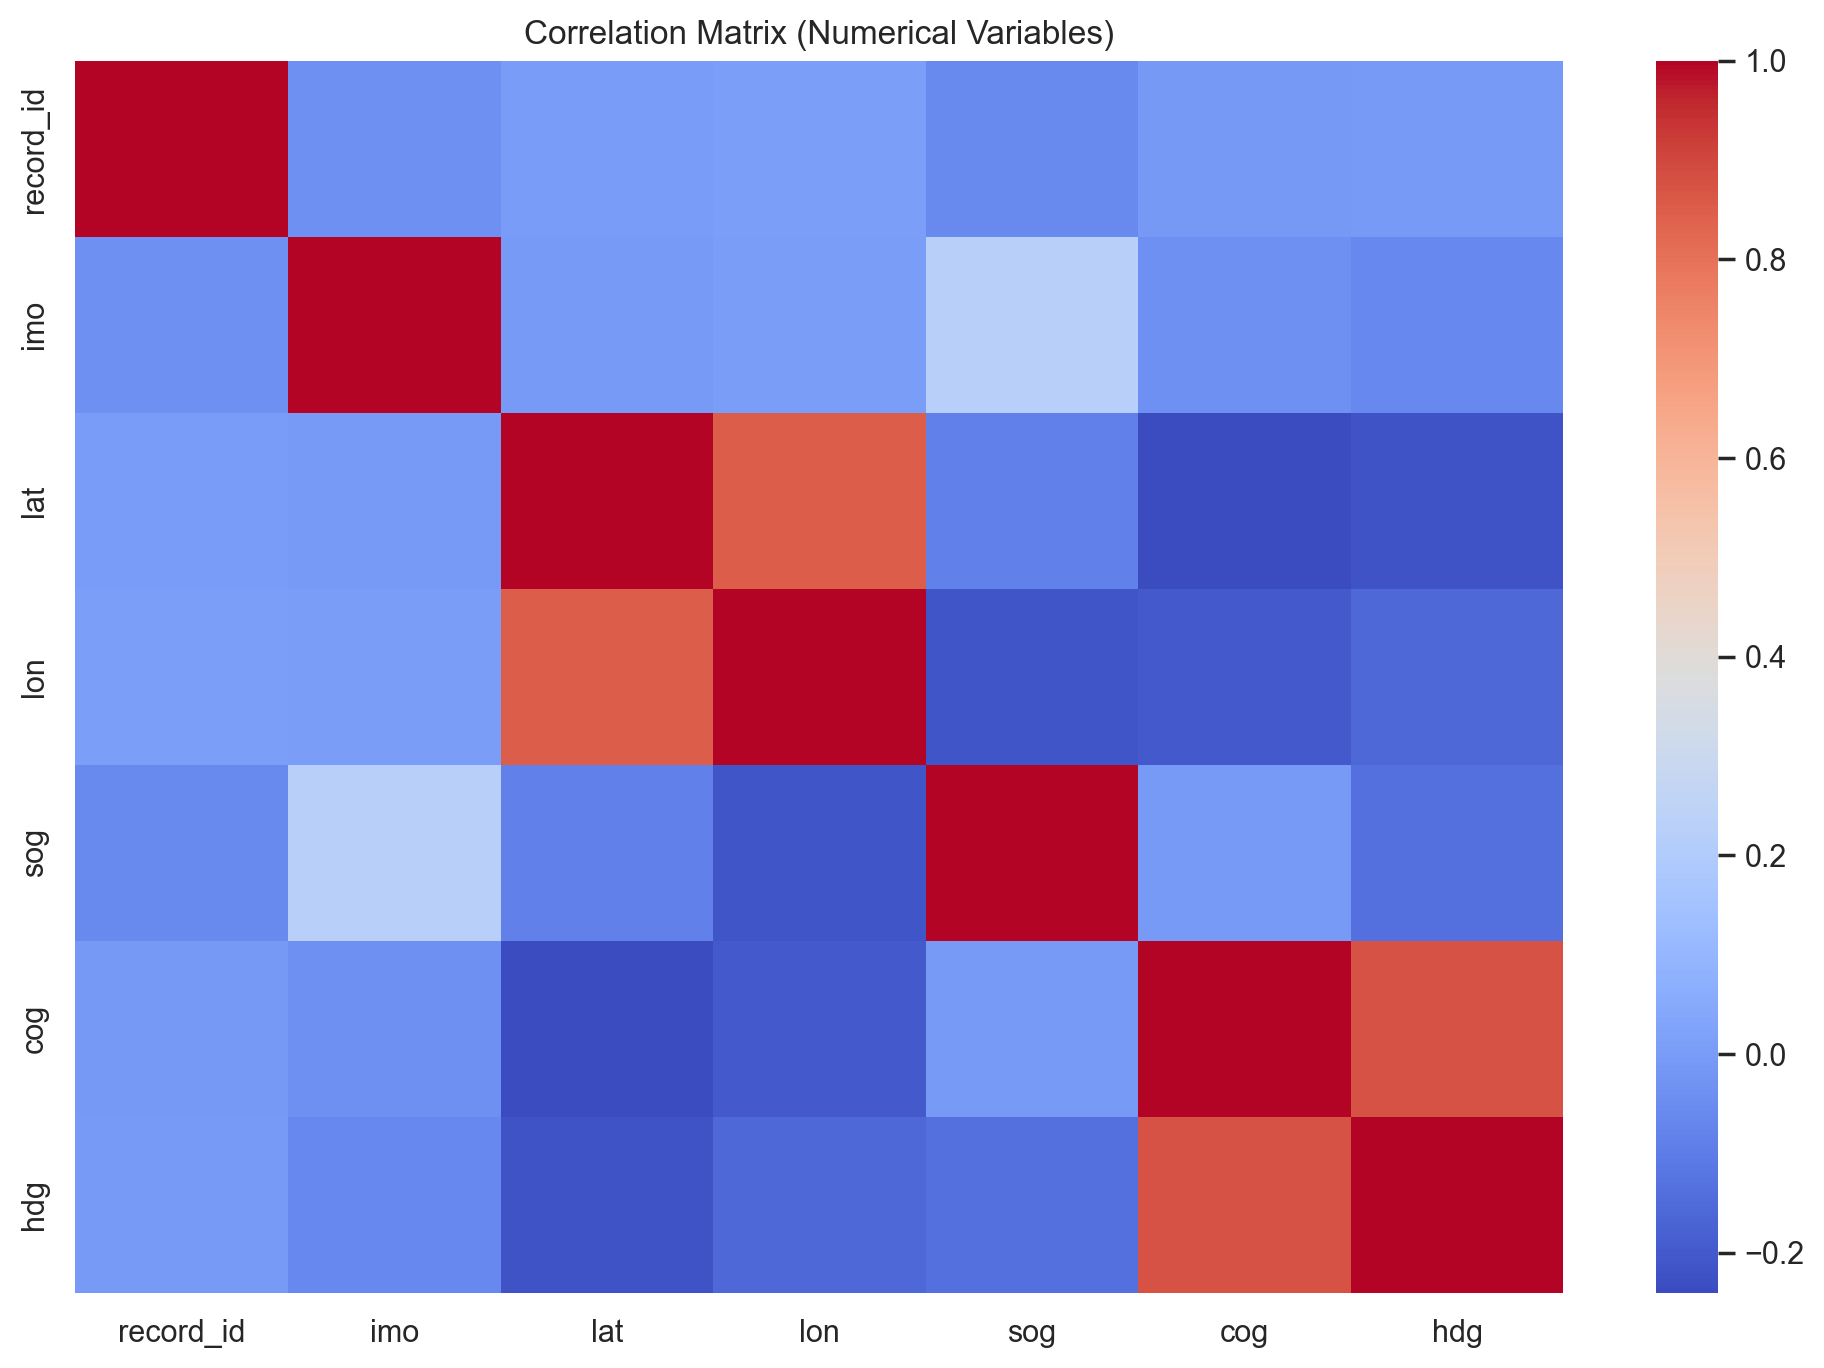

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Variables)")
plt.show()

- Weak correlations among movement variables, typical of AIS data.
- lat/lon correlation reflects real spatial trajectories.
- sog (speed) correlates mildly with cog/hdg due to maneuvering dynamics.

Correlation insights support downstream feature engineering (lags, rolling windows, movement patterns).

## TEMPORAL STRUCTURE / PATTERNS

Vessel traffic is highly temporal.  
Here, we extract basic time patterns for exploratory purposes.

### Daily number of AIS messages

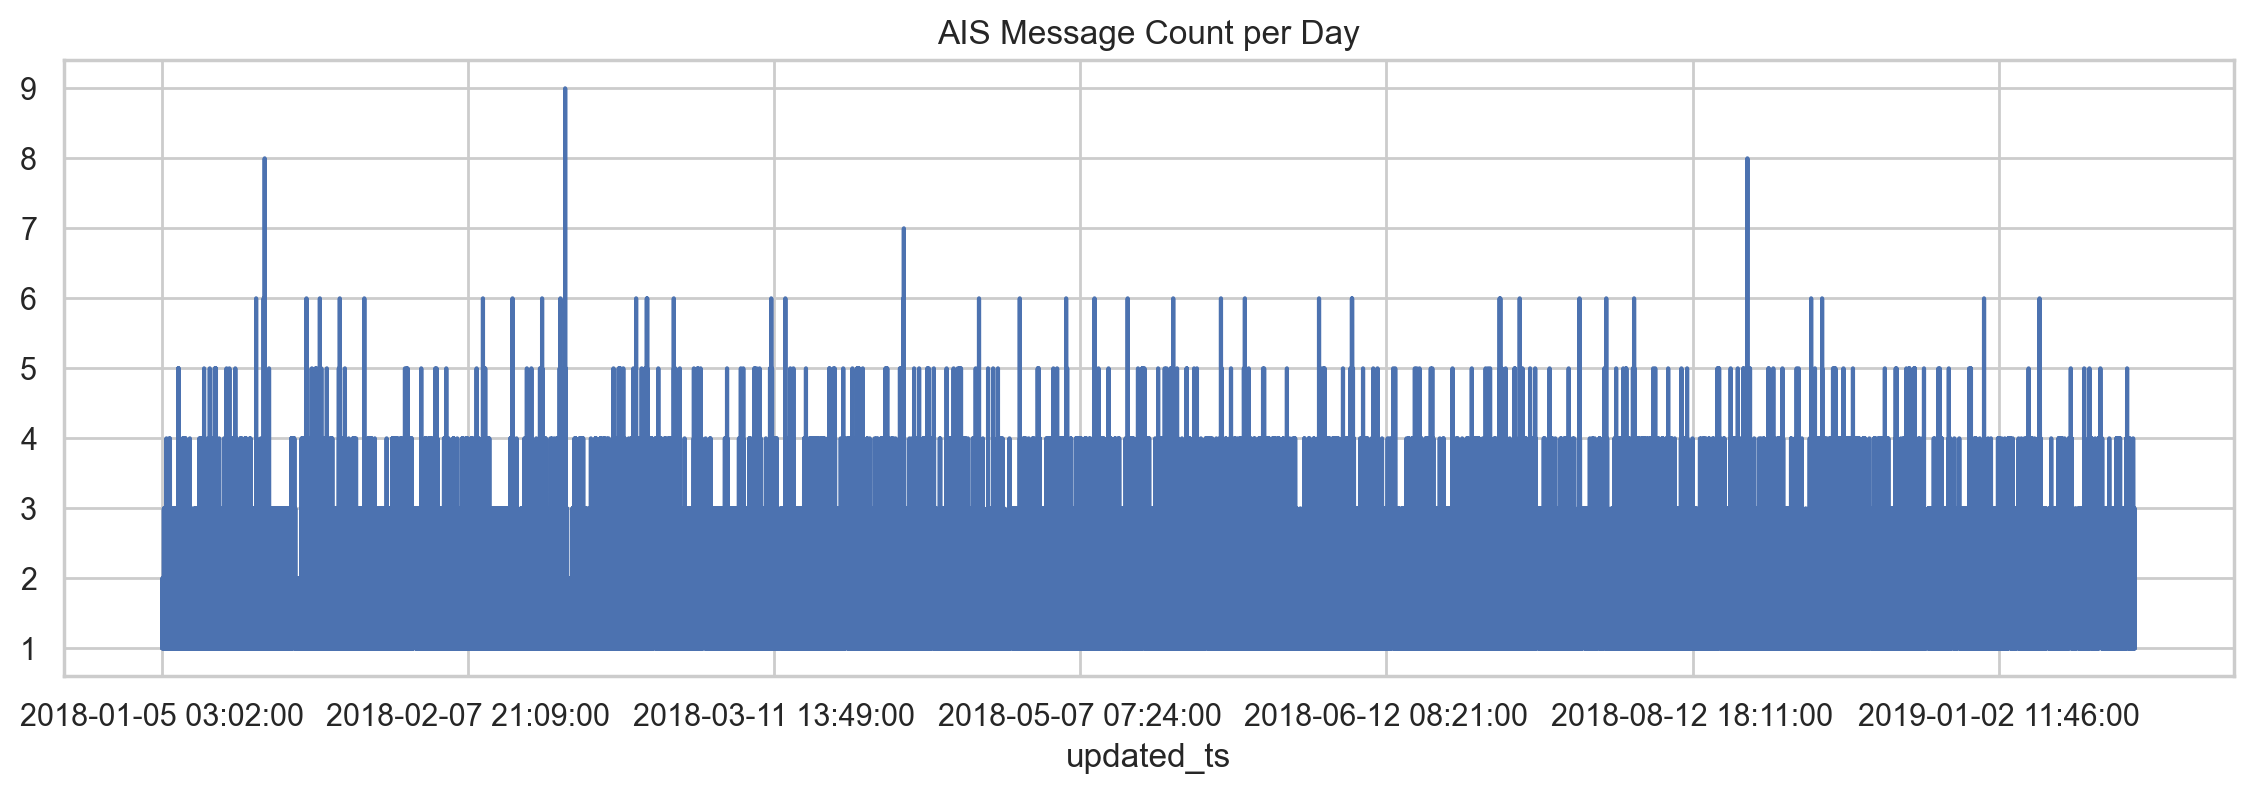

In [22]:
df["updated_ts"].value_counts().sort_index().plot(figsize=(14, 4))
plt.title("AIS Message Count per Day")
plt.show()

### Conclusions

- Activity patterns reflect reporting frequency, port operations, and vessel density.
- Daily volumes help identify seasonality or irregularities.

## GEOGRAPHICAL INSPECTION

A simple latitude/longitude scatter plot helps visualize vessel tracks.

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df["lon"], df["lat"], s=1, alpha=0.3)
plt.title("Geographical Distribution of Vessel Positions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

This visual confirms vessel corridors between ports in the dataset.

Geographical structure will be important for deriving route-based features.

## TARGET-SPECIFIC INSIGHT

The target for SmartPortAI will represent delay (binary or continuous).  

Once defined in Feature Engineering, additional EDA will be applied.

## SUMMARY AND NEXT STEPS

EDA confirms that the dataset exhibits strong temporal, geographical, and navigational structure. 

Movement variables show heavy tails and behavioral variability typical of AIS data. 

Categorical variables such as port identifiers and vessel names are interpretable and manageable. 

No statistically-driven cleaning actions are taken here; insights will guide the Feature Engineering notebook.

**Next steps:**
- build temporal features (lags, rolling windows)
- derive route features (distance-to-destination, speed changes)
- define delay target
- prepare modeling dataset